In [97]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

# Suppress Scientific Notation in Numpy
np.set_printoptions(suppress=True)

# Suppress Scientific Notation in Pandas
pd.set_option('display.float_format', '{:.2f}'.format)

import scipy.stats as stats
from scipy.special import inv_boxcox

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
# Classfication
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

## Problem Statement -


#### Given various features about a customer like `Age, Income, Loan Amount, Loan Intent, Home Ownership` etc. 

##### predict if in case the loan is given, will the customer `default or not on the Loan payments.`


### LOAD the Data

In [98]:
bank_df = pd.read_csv(r"C:\Data\credit_risk_dataset.csv")

In [99]:
bank_df.head()
bank_df.tail()
bank_df.describe()
bank_df.info()
bank_df.shape


person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT             123.00   
1          21           9600                   OWN               5.00   
2          25           9600              MORTGAGE               1.00   
3          23          65500                  RENT               4.00   
4          24          54400                  RENT               8.00   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

person_age  person_income person_home_ownership  person_emp_length  \
32576          57          53000              MORTGAGE               1.00   
32577          54         120000              MORTGAGE               4.00   
32578          65          76000                  RENT               3.00   
32579          56         150000              MORTGAGE               5.00   
32580          66          42000                  RENT               2.00   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
count    32581.00       32581.00           31686.00   32581.00       29465.00   
mean        27.73       66074.85               4.79    9589.37          11.01   
std          6.35       61983.12               4.14    6322.09           3.24   
min         20.00        4000.00               0.00     500.00           5.42   
25%         23.00       38500.00               2.00    5000.00           7.90   
50%         26.00       55000.00               4.00    8000.00          10.99   
75%         30.00       79200.00               7.00   12200.00          13.47   
max        144.00     6000000.00             123.00   35000.00          23.22   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
count     32581.00             32581.00                    32581.00  
mean          0.22                 0.17                        5.80  
std           0.41                 0.11                        4.06  
min           0.00                 0.00                        2.00  
25%           0.00                 0.09                        3.00  
50%           0.00                 0.15                        4.00  
75%           0.00                 0.23                        8.00  
max           1.00                 0.83                       30.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


(32581, 12)

## Data Cleaning/Data preprocessing

### Check for duplicate rows

In [100]:
bank_df.duplicated().value_counts()

False    32416
True       165
dtype: int64

In [101]:
bank_df[bank_df.duplicated()]

person_age  person_income person_home_ownership  person_emp_length  \
15975          23          42000                  RENT               5.00   
15989          23          90000              MORTGAGE               7.00   
15995          24          48000              MORTGAGE               4.00   
16025          24          10000                  RENT               8.00   
16028          23         100000              MORTGAGE               7.00   
...           ...            ...                   ...                ...   
32010          42          39996              MORTGAGE               2.00   
32047          36         250000                  RENT               2.00   
32172          49         120000              MORTGAGE              12.00   
32259          39          40000                   OWN               4.00   
32279          43          11340                  RENT               4.00   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
15975            VENTURE          B       6000           9.99            0   
15989          EDUCATION          B       8000          10.36            0   
15995            MEDICAL          A       4000           5.42            0   
16025           PERSONAL          A       3000           7.90            1   
16028          EDUCATION          A      15000           7.88            0   
...                  ...        ...        ...            ...          ...   
32010    HOMEIMPROVEMENT          A       2500           5.42            0   
32047  DEBTCONSOLIDATION          A      20000           7.88            0   
32172            MEDICAL          B      12000          10.99            0   
32259            VENTURE          B       1000          10.37            0   
32279          EDUCATION          C       1950            NaN            1   

       loan_percent_income cb_person_default_on_file  \
15975                 0.14                         N   
15989                 0.09                         N   
15995                 0.08                         N   
16025                 0.30                         N   
16028                 0.15                         N   
...                    ...                       ...   
32010                 0.06                         N   
32047                 0.08                         N   
32172                 0.10                         N   
32259                 0.03                         N   
32279                 0.17                         N   

       cb_person_cred_hist_length  
15975                           4  
15989                           3  
15995                           4  
16025                           3  
16028                           4  
...                           ...  
32010                          12  
32047                          17  
32172                          12  
32259                          16  
32279                          11  

[165 rows x 12 columns]

In [102]:
# Dropping Duplicates
bank_df = bank_df.drop_duplicates(keep = 'first')
bank_df.shape

(32416, 12)

### Missing values

### Before
                bank_df.isna().sum()
```python
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
```

In [103]:
emp_median = bank_df.person_emp_length.median()

In [104]:
bank_df.person_emp_length = bank_df.person_emp_length.fillna(emp_median)

In [105]:
int_median = bank_df.loan_int_rate.median()

In [106]:
bank_df.loan_int_rate = bank_df.loan_int_rate.fillna(int_median)

In [107]:
bank_df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [108]:
bank_df.corr()

person_age  person_income  person_emp_length  \
person_age                        1.00           0.17               0.16   
person_income                     0.17           1.00               0.13   
person_emp_length                 0.16           0.13               1.00   
loan_amnt                         0.05           0.27               0.11   
loan_int_rate                     0.01           0.00              -0.05   
loan_status                      -0.02          -0.15              -0.08   
loan_percent_income              -0.04          -0.25              -0.05   
cb_person_cred_hist_length        0.86           0.12               0.14   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                       0.05           0.01        -0.02   
person_income                    0.27           0.00        -0.15   
person_emp_length                0.11          -0.05        -0.08   
loan_amnt                        1.00           0.14         0.11   
loan_int_rate                    0.14           1.00         0.32   
loan_status                      0.11           0.32         1.00   
loan_percent_income              0.57           0.11         0.38   
cb_person_cred_hist_length       0.04           0.01        -0.02   

                            loan_percent_income  cb_person_cred_hist_length  
person_age                                -0.04                        0.86  
person_income                             -0.25                        0.12  
person_emp_length                         -0.05                        0.14  
loan_amnt                                  0.57                        0.04  
loan_int_rate                              0.11                        0.01  
loan_status                                0.38                       -0.02  
loan_percent_income                        1.00                       -0.03  
cb_person_cred_hist_length                -0.03                        1.00

In [109]:
bank_df.skew()

person_age                    2.58
person_income                32.96
person_emp_length             2.67
loan_amnt                     1.19
loan_int_rate                 0.22
loan_status                   1.36
loan_percent_income           1.06
cb_person_cred_hist_length    1.66
dtype: float64

In [110]:
#num=bank_df.select_dtypes(include='number')
#num
#def out(col):
#    q1=bank_df[col].quantile(0.25)
#    q3=bank_df[col].quantile(0.75)
#    iqr=q3-q1
#    lb=q1-(1.5*iqr)
#    ub=q3+(1.5*iqr)
#    outliers=bank_df[(bank_df[col]<lb) | (bank_df[col]>ub)].index
#    return outliers
#droplist=[]
#for i in num:
#    droplist.extend(out(i))

In [111]:
# Box Plot method for Person income
Q1, Q2, Q3 = tuple(bank_df.person_income.quantile(q = [0.25,0.5,0.75]).values)

In [112]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR
print(IQR, UL, LL)

40676.0 140232.0 -22472.0


In [113]:
out_list = bank_df[(bank_df.person_income > UL) | (bank_df.person_income < LL)].index.tolist()

In [114]:
bank_df = bank_df.drop(out_list, axis = 0).reset_index()

In [115]:
# Box Plot method for Person Age
q1, q2, q3 = tuple(bank_df.person_age.quantile(q = [0.25,0.5,0.75]).values)

In [116]:
IqR = q3-q1
U_L = q3 + 1.5*IqR
L_L = q1-1.5*IqR
print(IqR, U_L, L_L)

7.0 40.5 12.5


In [117]:
outlist = bank_df[(bank_df.person_age > U_L) | (bank_df.person_age < L_L)].index.tolist()

In [118]:
bank_df = bank_df.drop(outlist, axis = 0).reset_index()

In [119]:
bank_df= bank_df.drop(['level_0','index'],axis=1)

In [120]:
bank_df.shape
bank_df.skew()

(29568, 12)

person_age                   0.97
person_income                0.74
person_emp_length            2.03
loan_amnt                    1.18
loan_int_rate                0.21
loan_status                  1.32
loan_percent_income          1.04
cb_person_cred_hist_length   1.29
dtype: float64

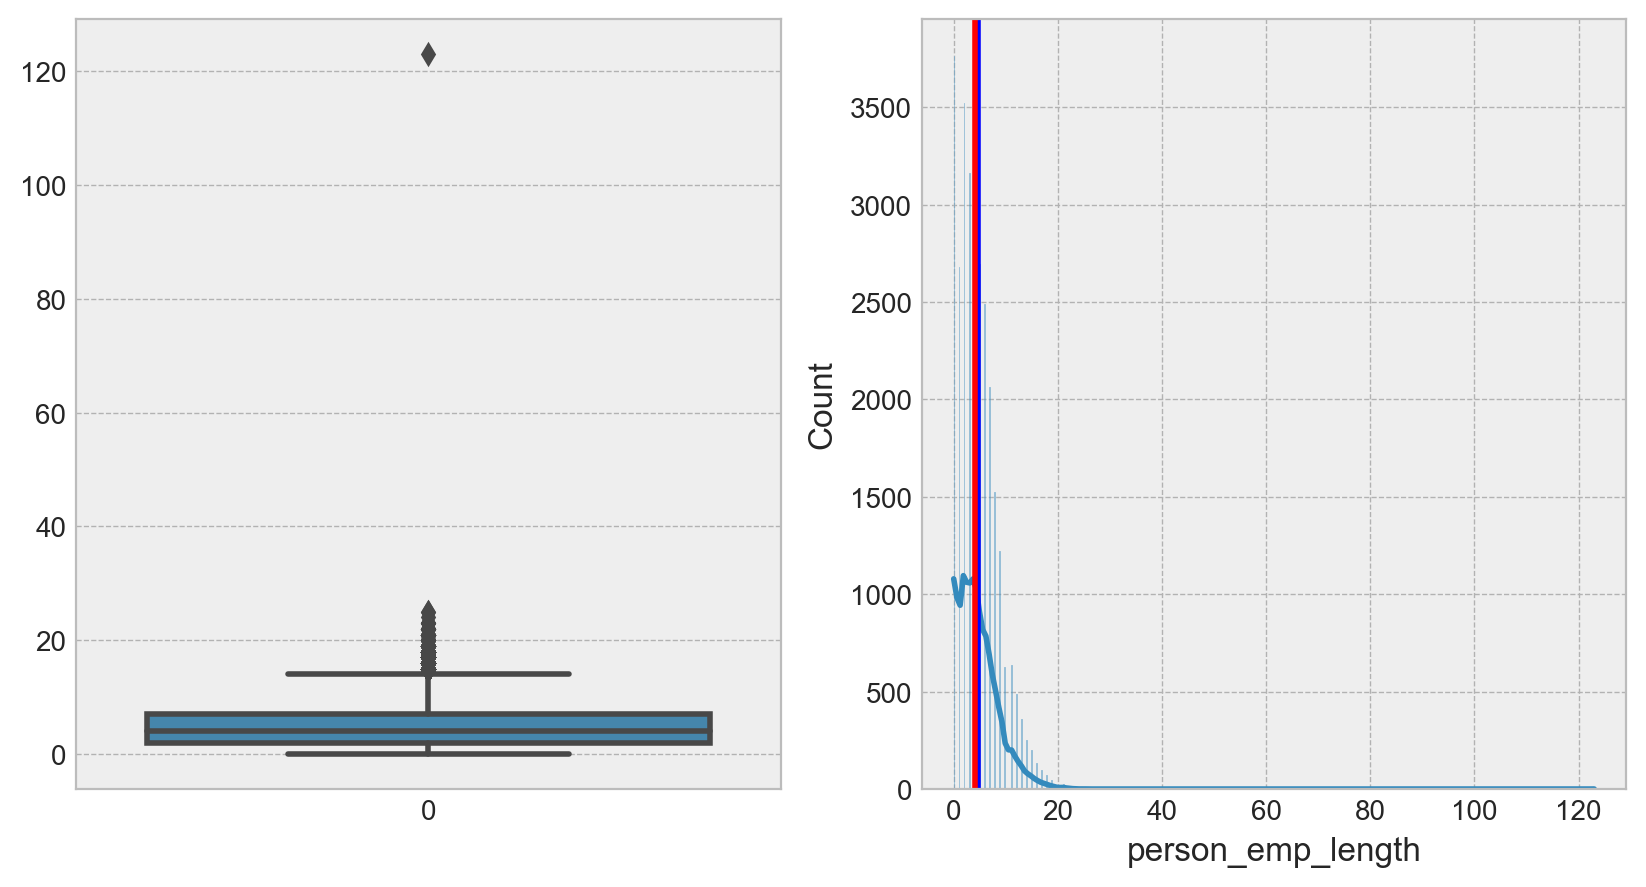

In [121]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.boxplot(bank_df.person_emp_length);

plt.subplot(122)
sns.histplot(bank_df.person_emp_length, kde = True);
plt.axvline(bank_df.person_emp_length.mean(), color = 'blue');
plt.axvline(bank_df.person_emp_length.median(), color = 'red');

### Univariate analysis

In [122]:
pd.cut(bank_df.person_age,bins=3).value_counts()

(19.98, 26.667]     17211
(26.667, 33.333]     9310
(33.333, 40.0]       3047
Name: person_age, dtype: int64

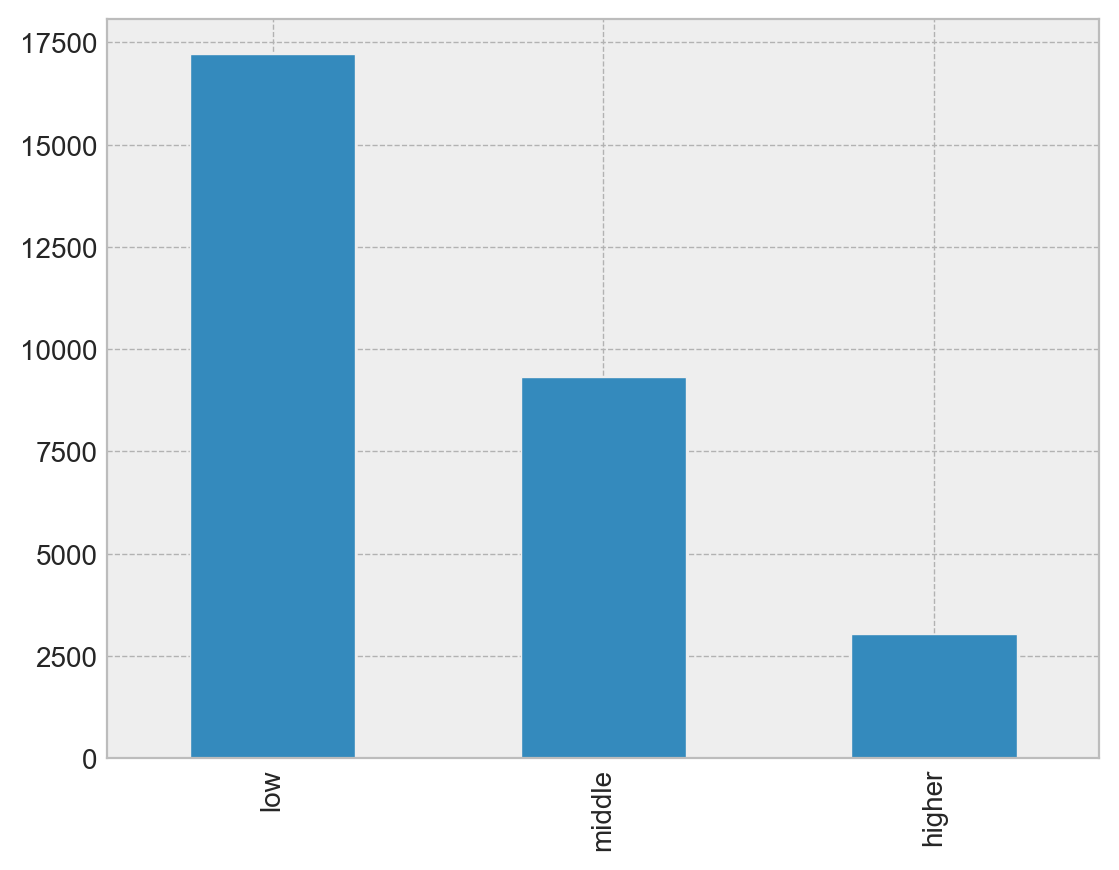

In [123]:
pd.cut(bank_df.person_age, bins = 3, labels=['low','middle','higher']).value_counts().plot(kind= 'bar');

In [124]:
pd.cut(bank_df.person_income,bins=3).value_counts()

(49388.0, 94696.0]     13318
(3944.076, 49388.0]    12635
(94696.0, 140004.0]     3615
Name: person_income, dtype: int64

In [198]:
bank_df.groupby(['loan_status'])[['person_income']] .mean()

person_income
loan_status               
0                 62382.99
1                 45478.03

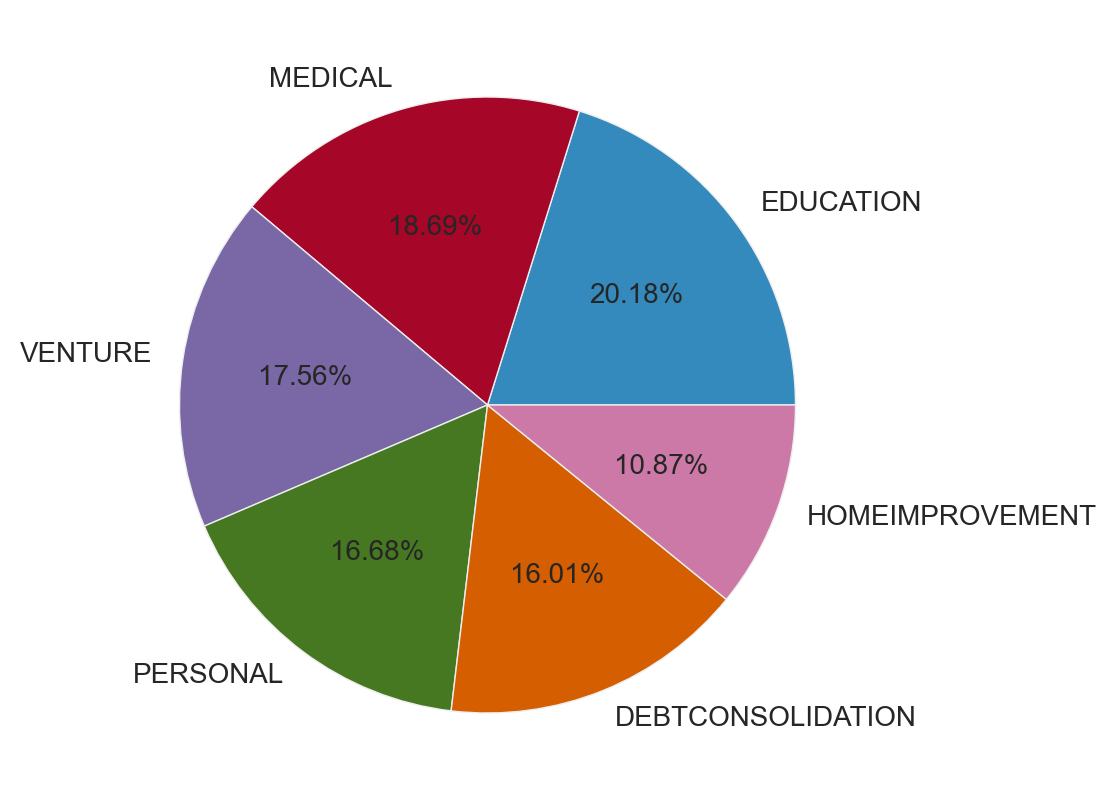

In [126]:
plt.figure(figsize=(5,5))
plt.pie(x = bank_df.loan_intent.value_counts().values,
        labels = bank_df.loan_intent.value_counts().index, autopct = '%.2f%%')
plt.show();

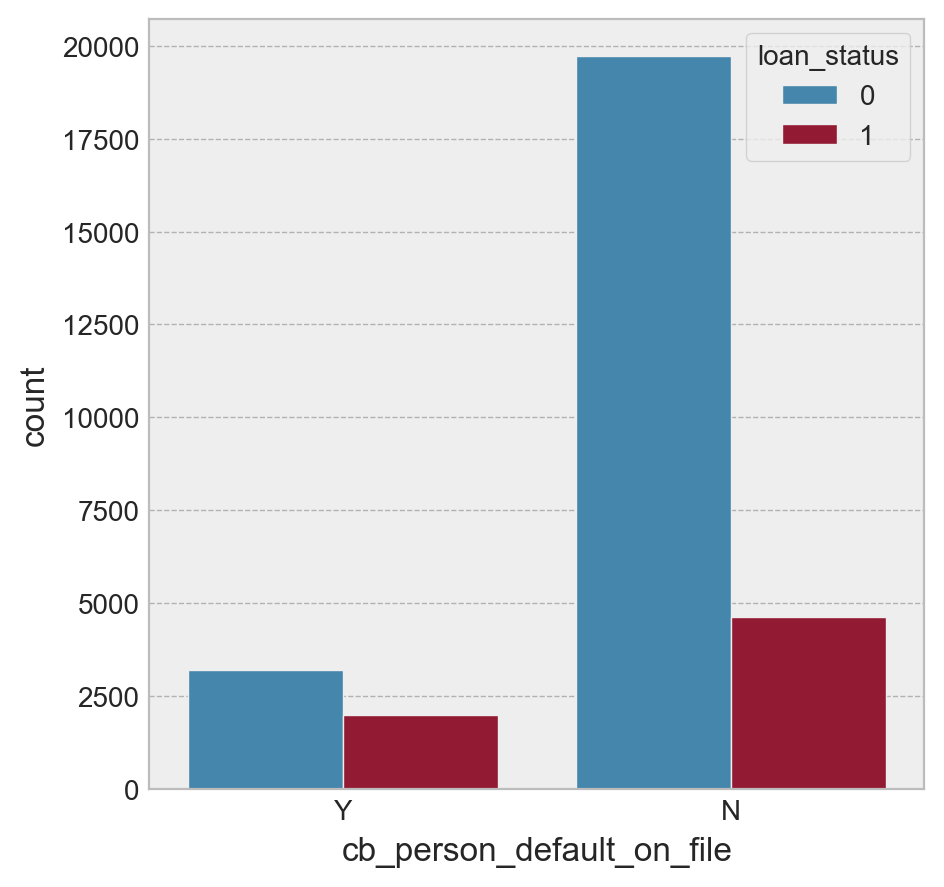

In [202]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'cb_person_default_on_file',hue='loan_status', data = bank_df);

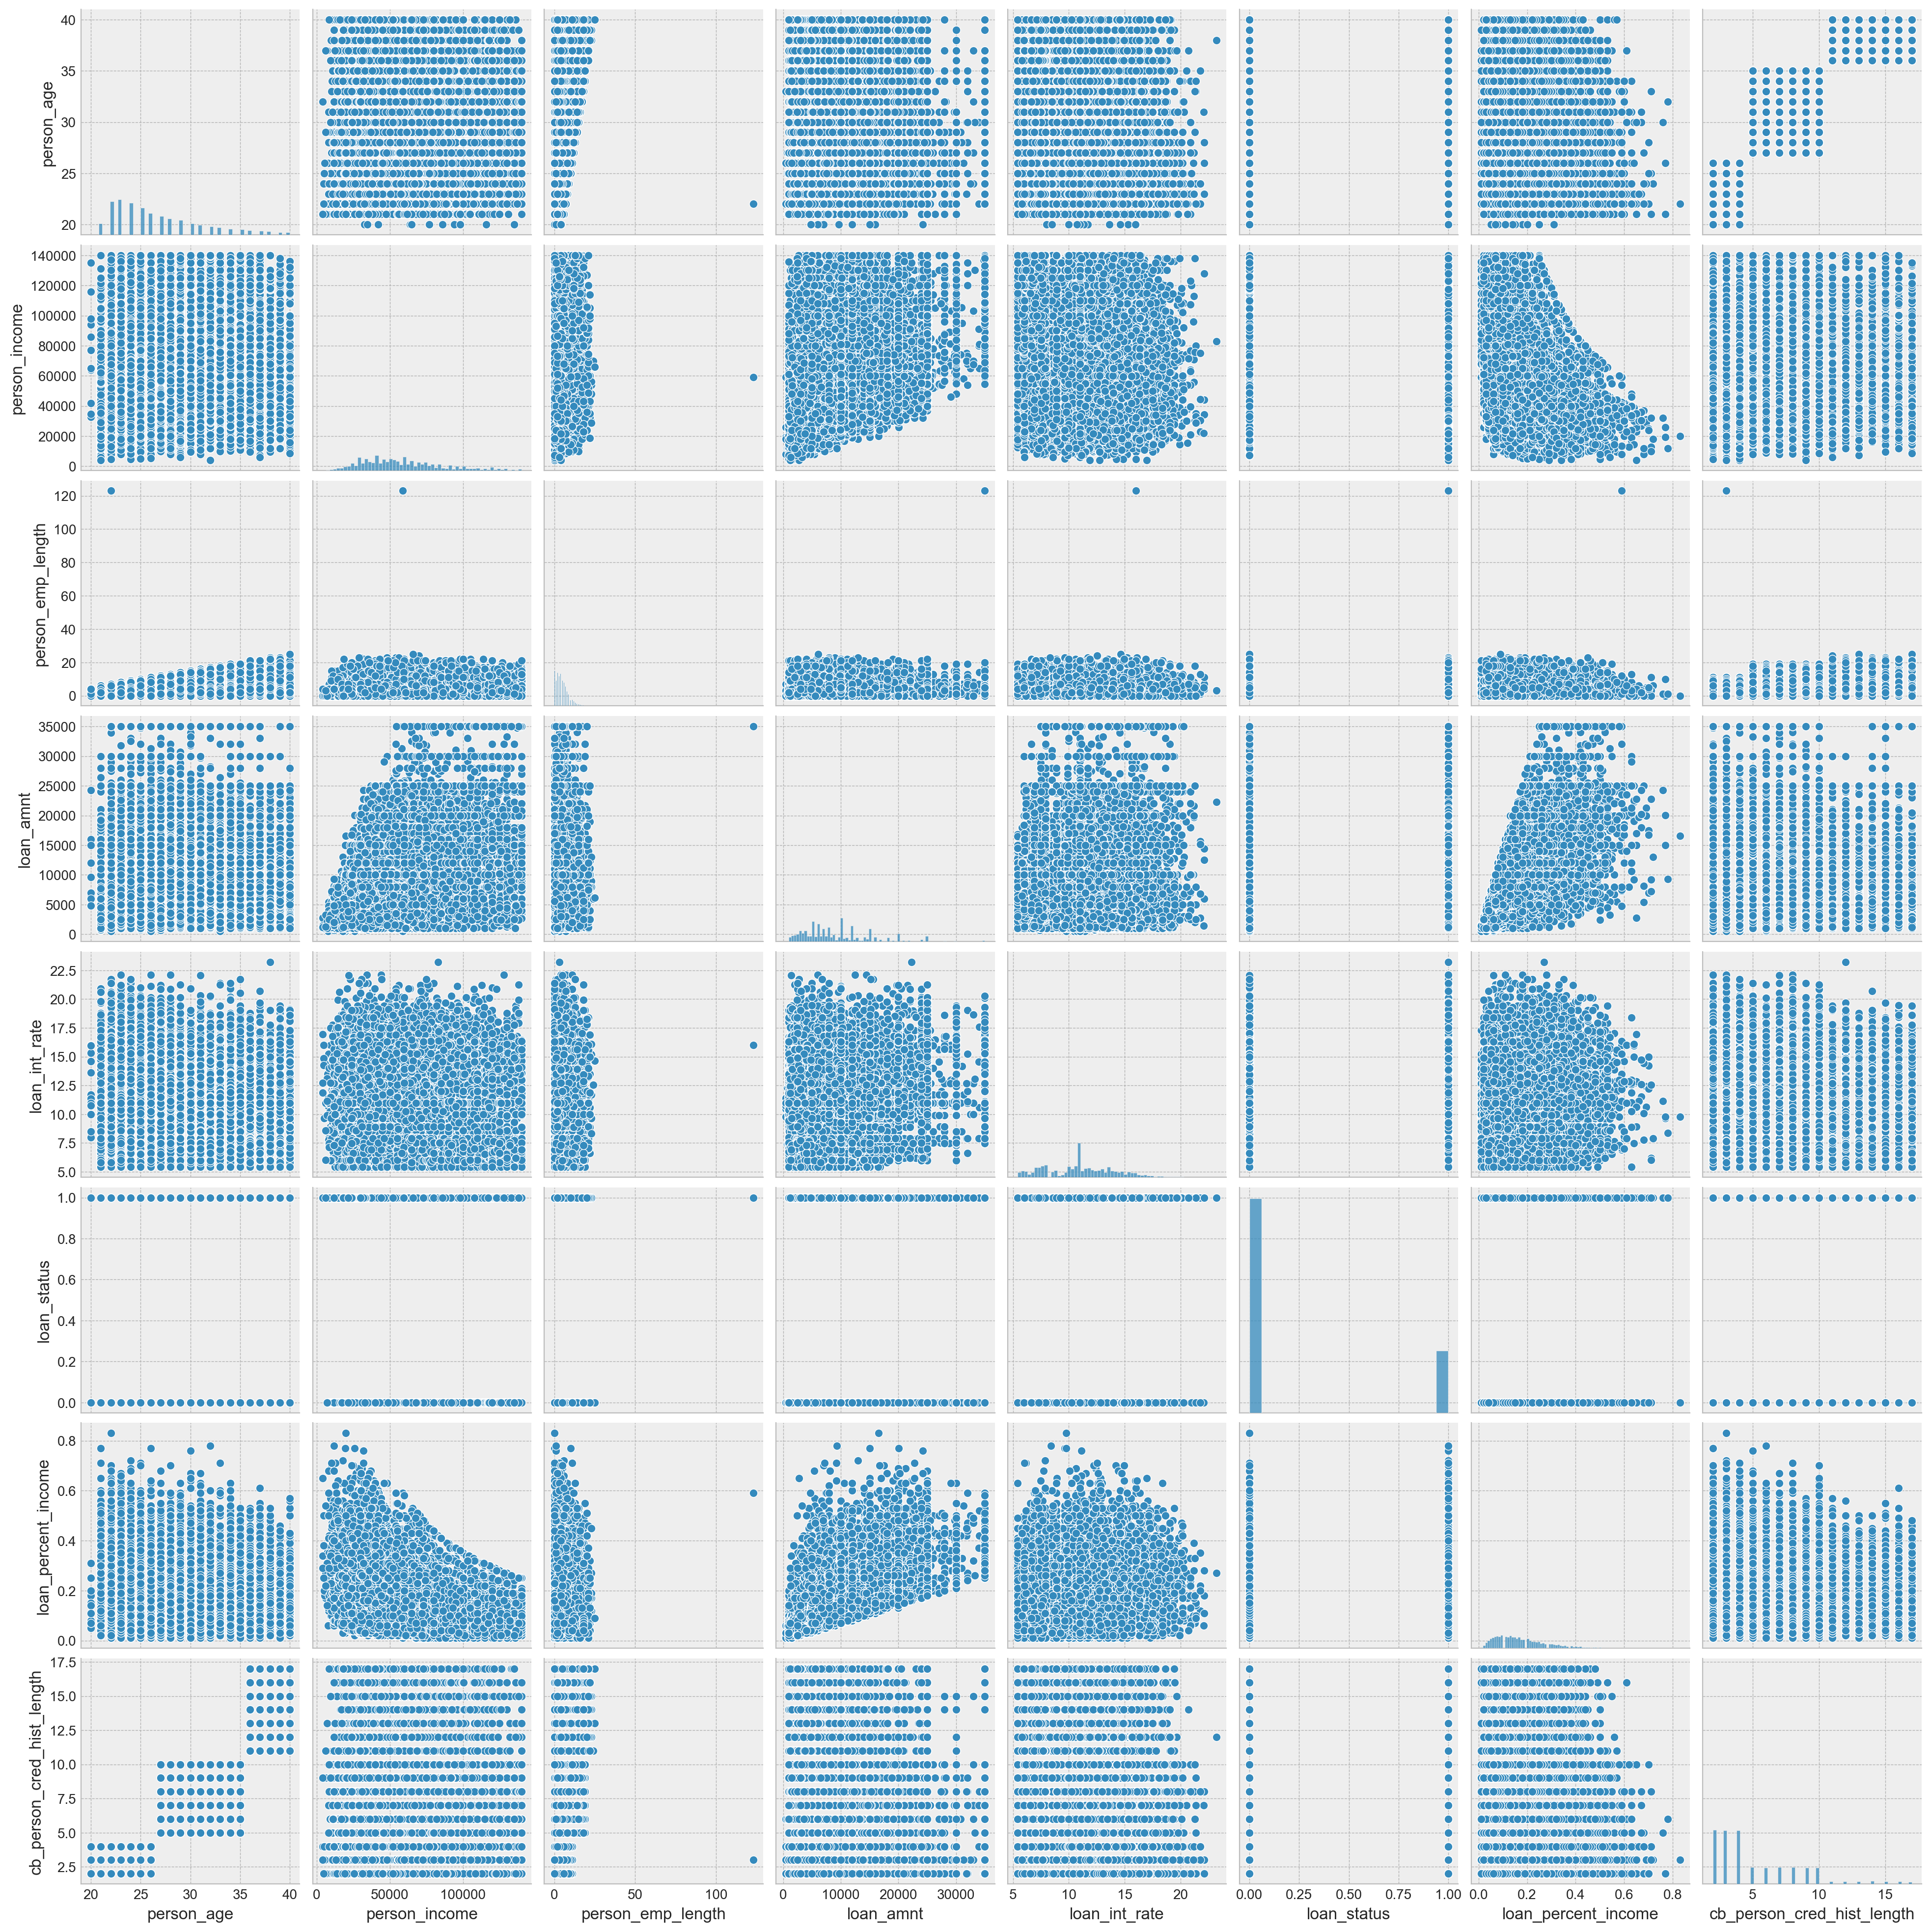

In [213]:
sns.pairplot(bank_df);

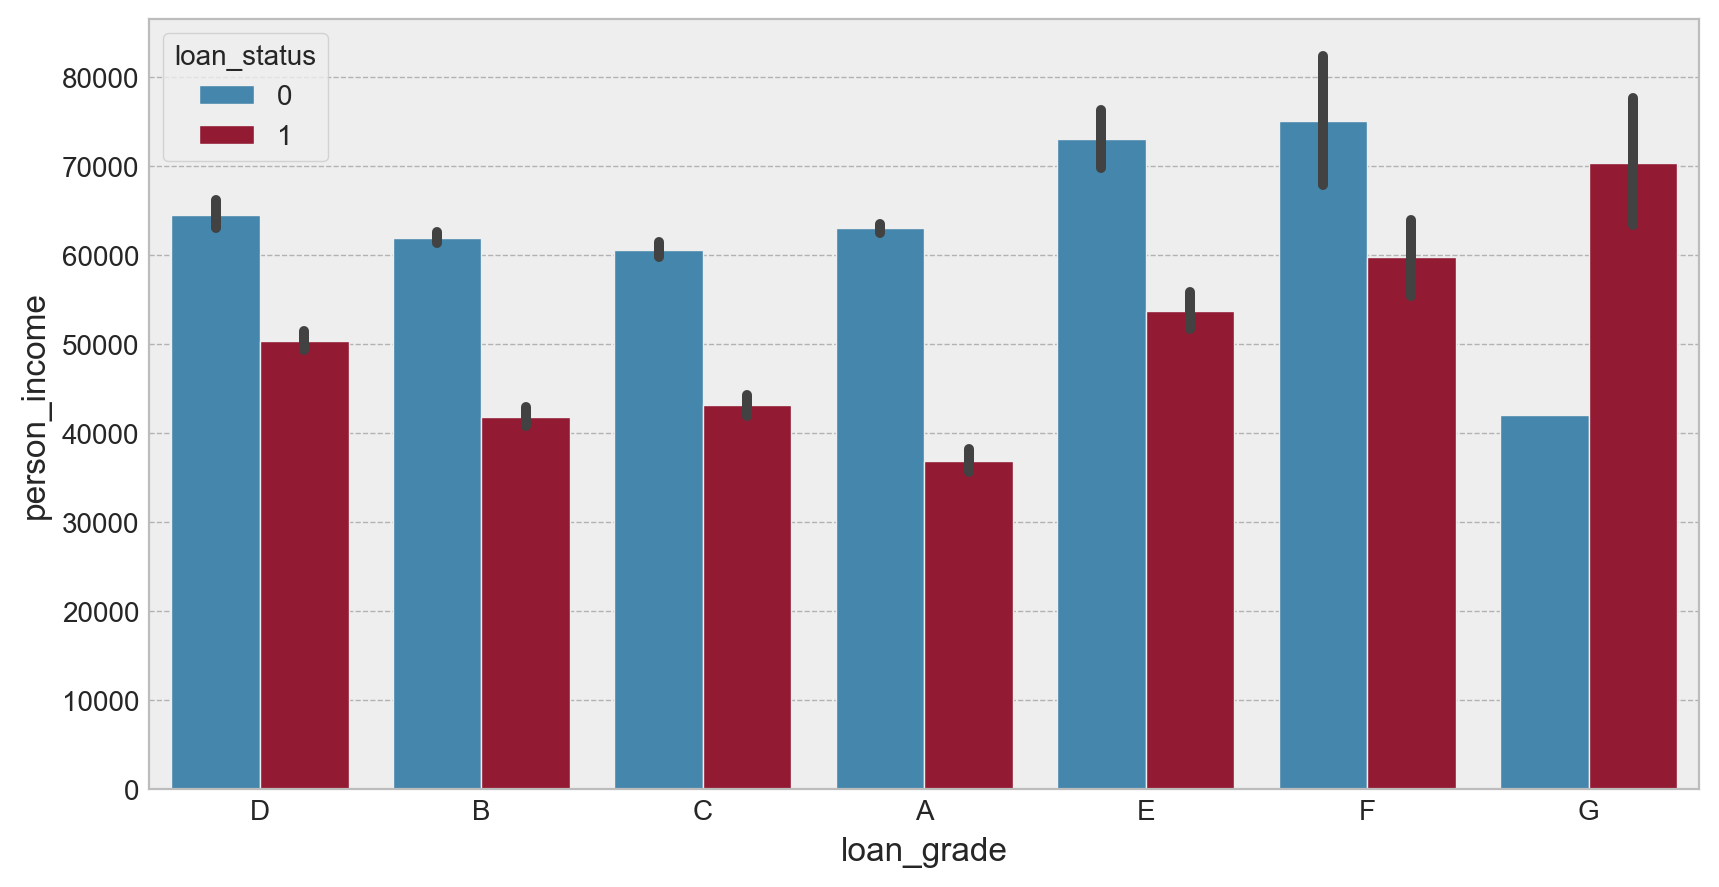

In [194]:
plt.figure(figsize=(10,5))
sns.barplot(x='loan_grade',y='person_income',hue='loan_status',data=bank_df);

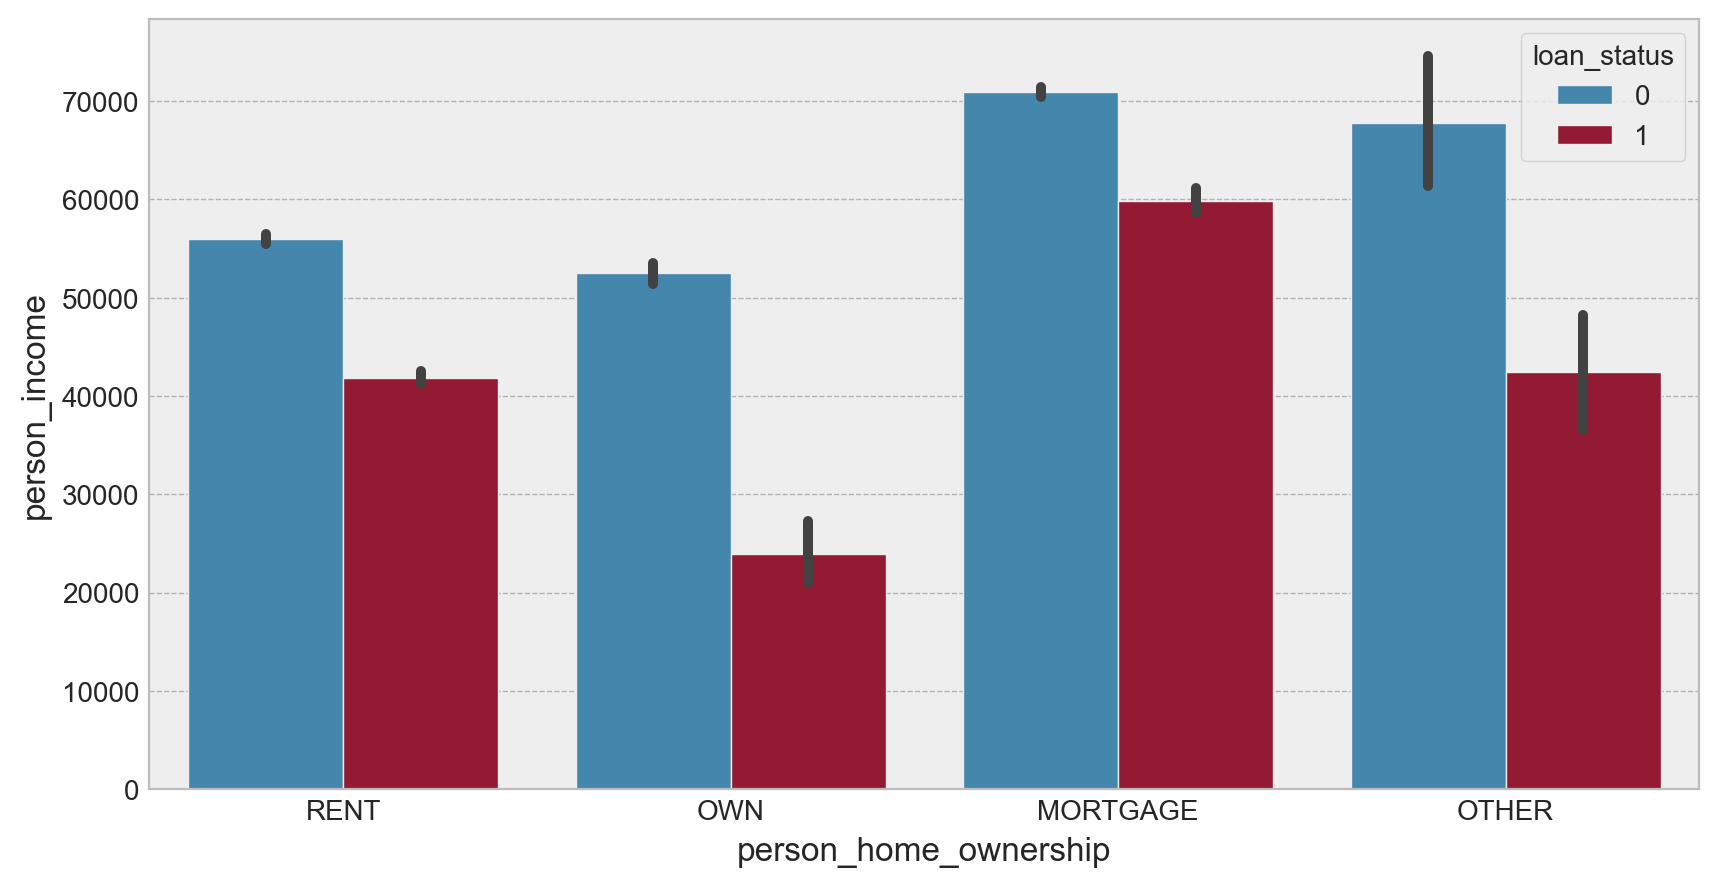

In [199]:
plt.figure(figsize=(10,5))
sns.barplot(x='person_home_ownership',y='person_income',hue='loan_status',data=bank_df);

In [203]:
bank_df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT             123.00   
1          21           9600                   OWN               5.00   
2          25           9600              MORTGAGE               1.00   
3          23          65500                  RENT               4.00   
4          24          54400                  RENT               8.00   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

<Figure size 1500x500 with 0 Axes>

<AxesSubplot: xlabel='cb_person_cred_hist_length', ylabel='person_income'>

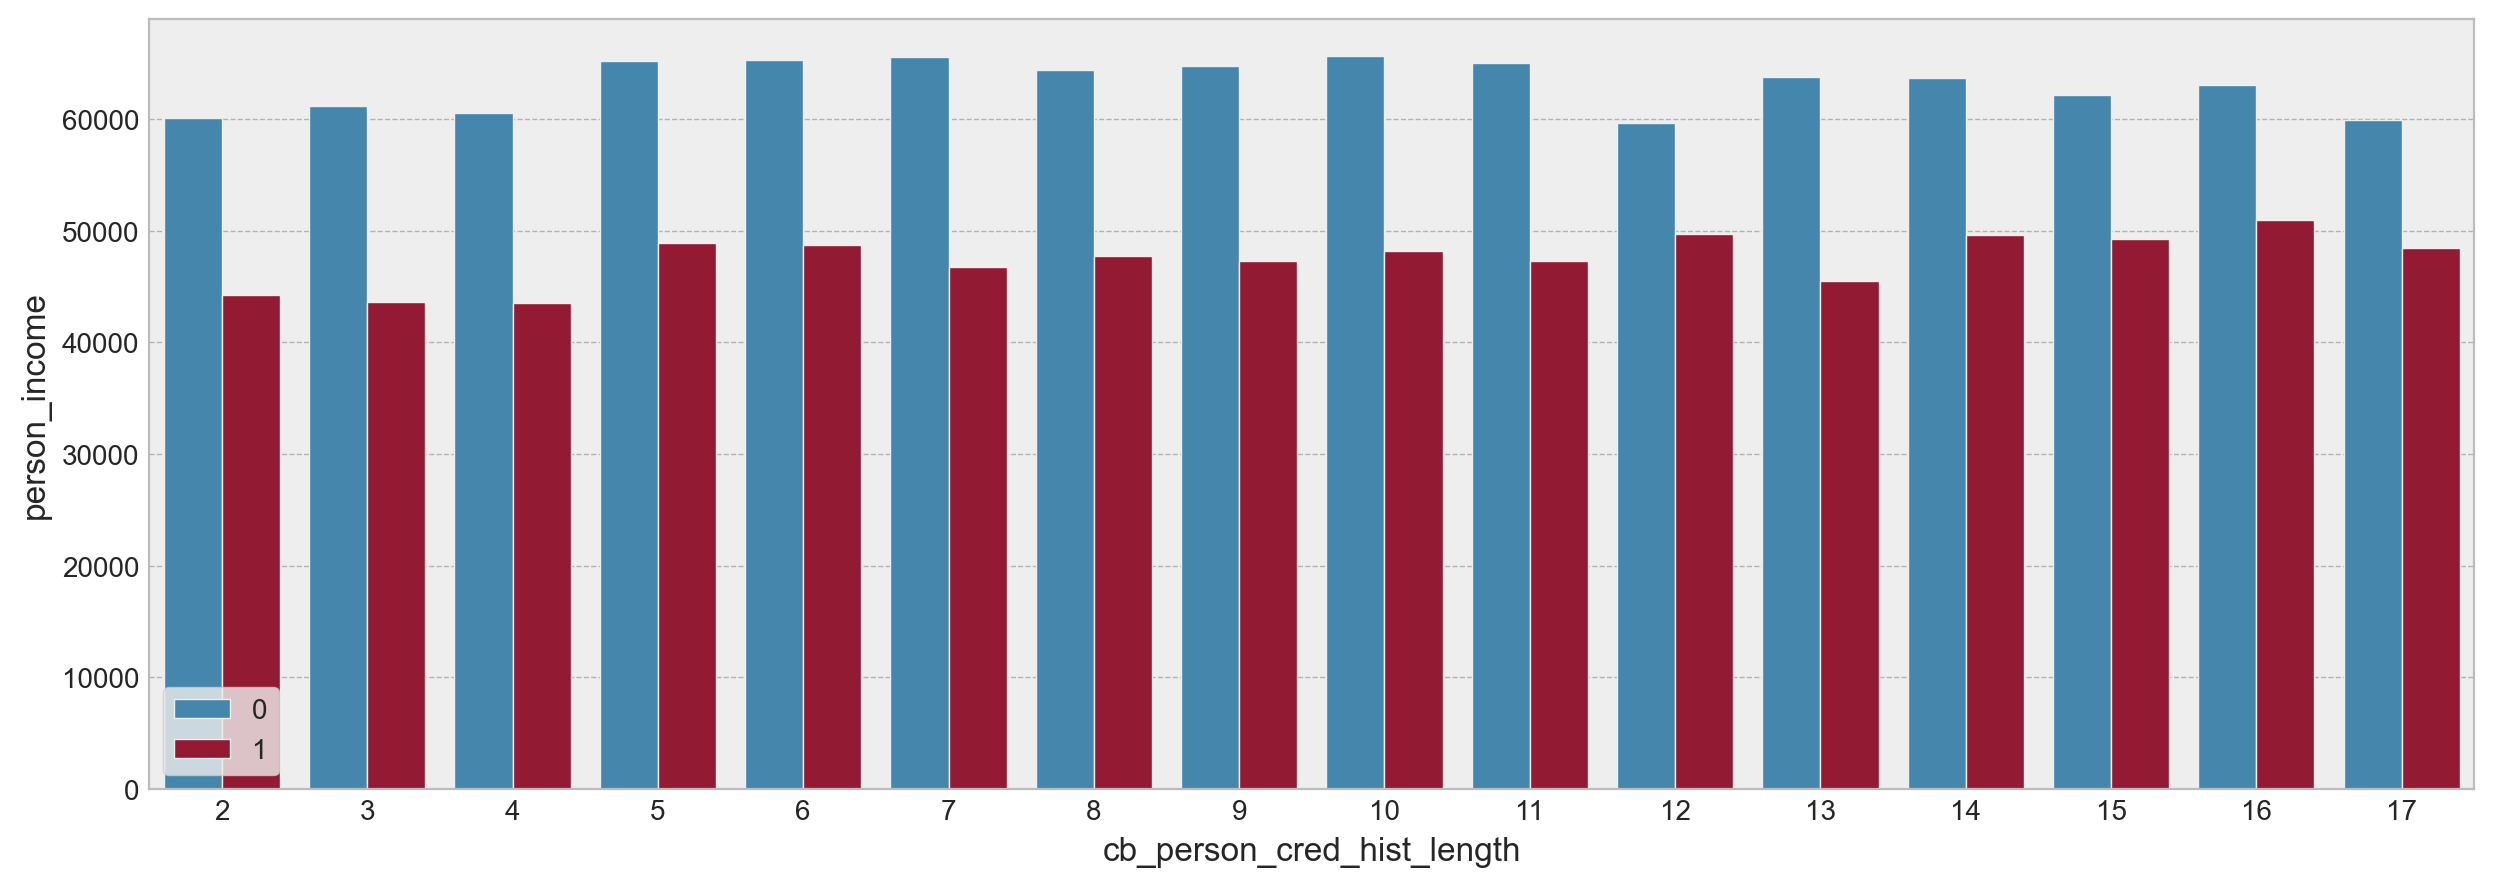

In [215]:
plt.figure(figsize=(15,5))
sns.barplot(x='cb_person_cred_hist_length',y='person_income',hue='loan_status',ci=False,data=bank_df);
plt.legend(loc = 'best')

In [209]:
Heat = bank_df.corr()

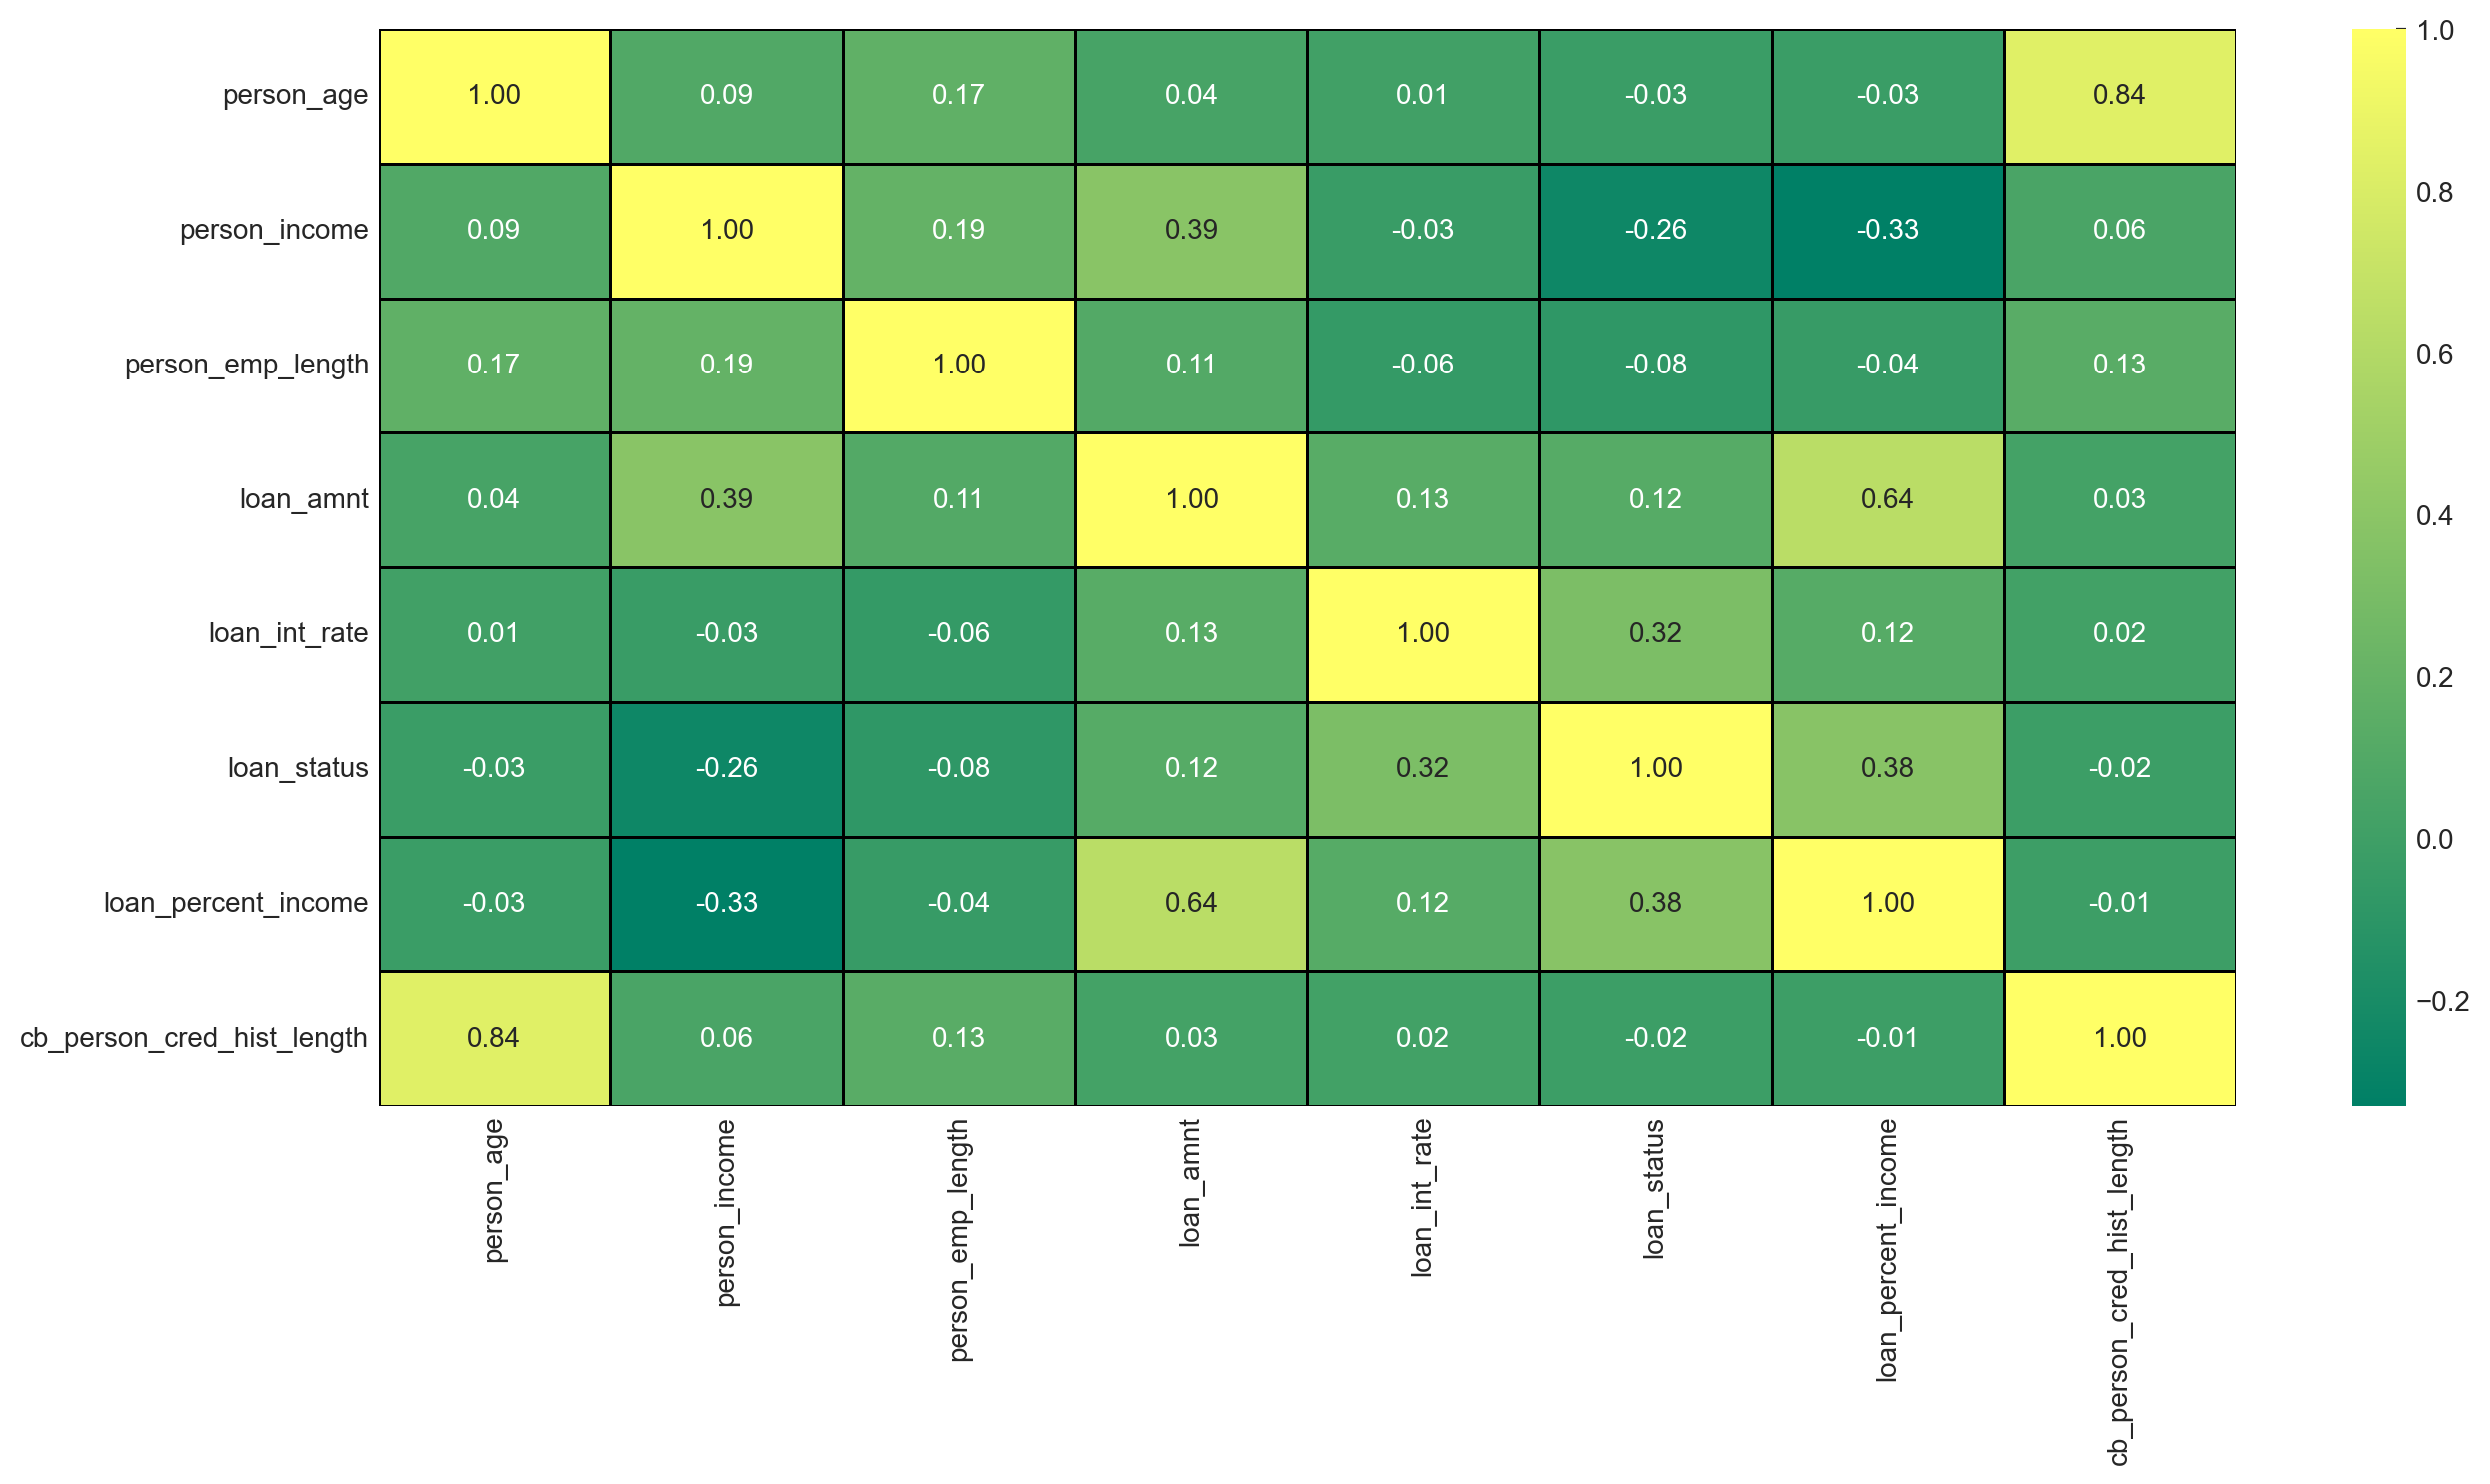

In [211]:
plt.figure(figsize=(15,7))
sns.heatmap(Heat, annot=True, fmt = '.2f', linewidths=0.5, cmap='summer', linecolor='black');


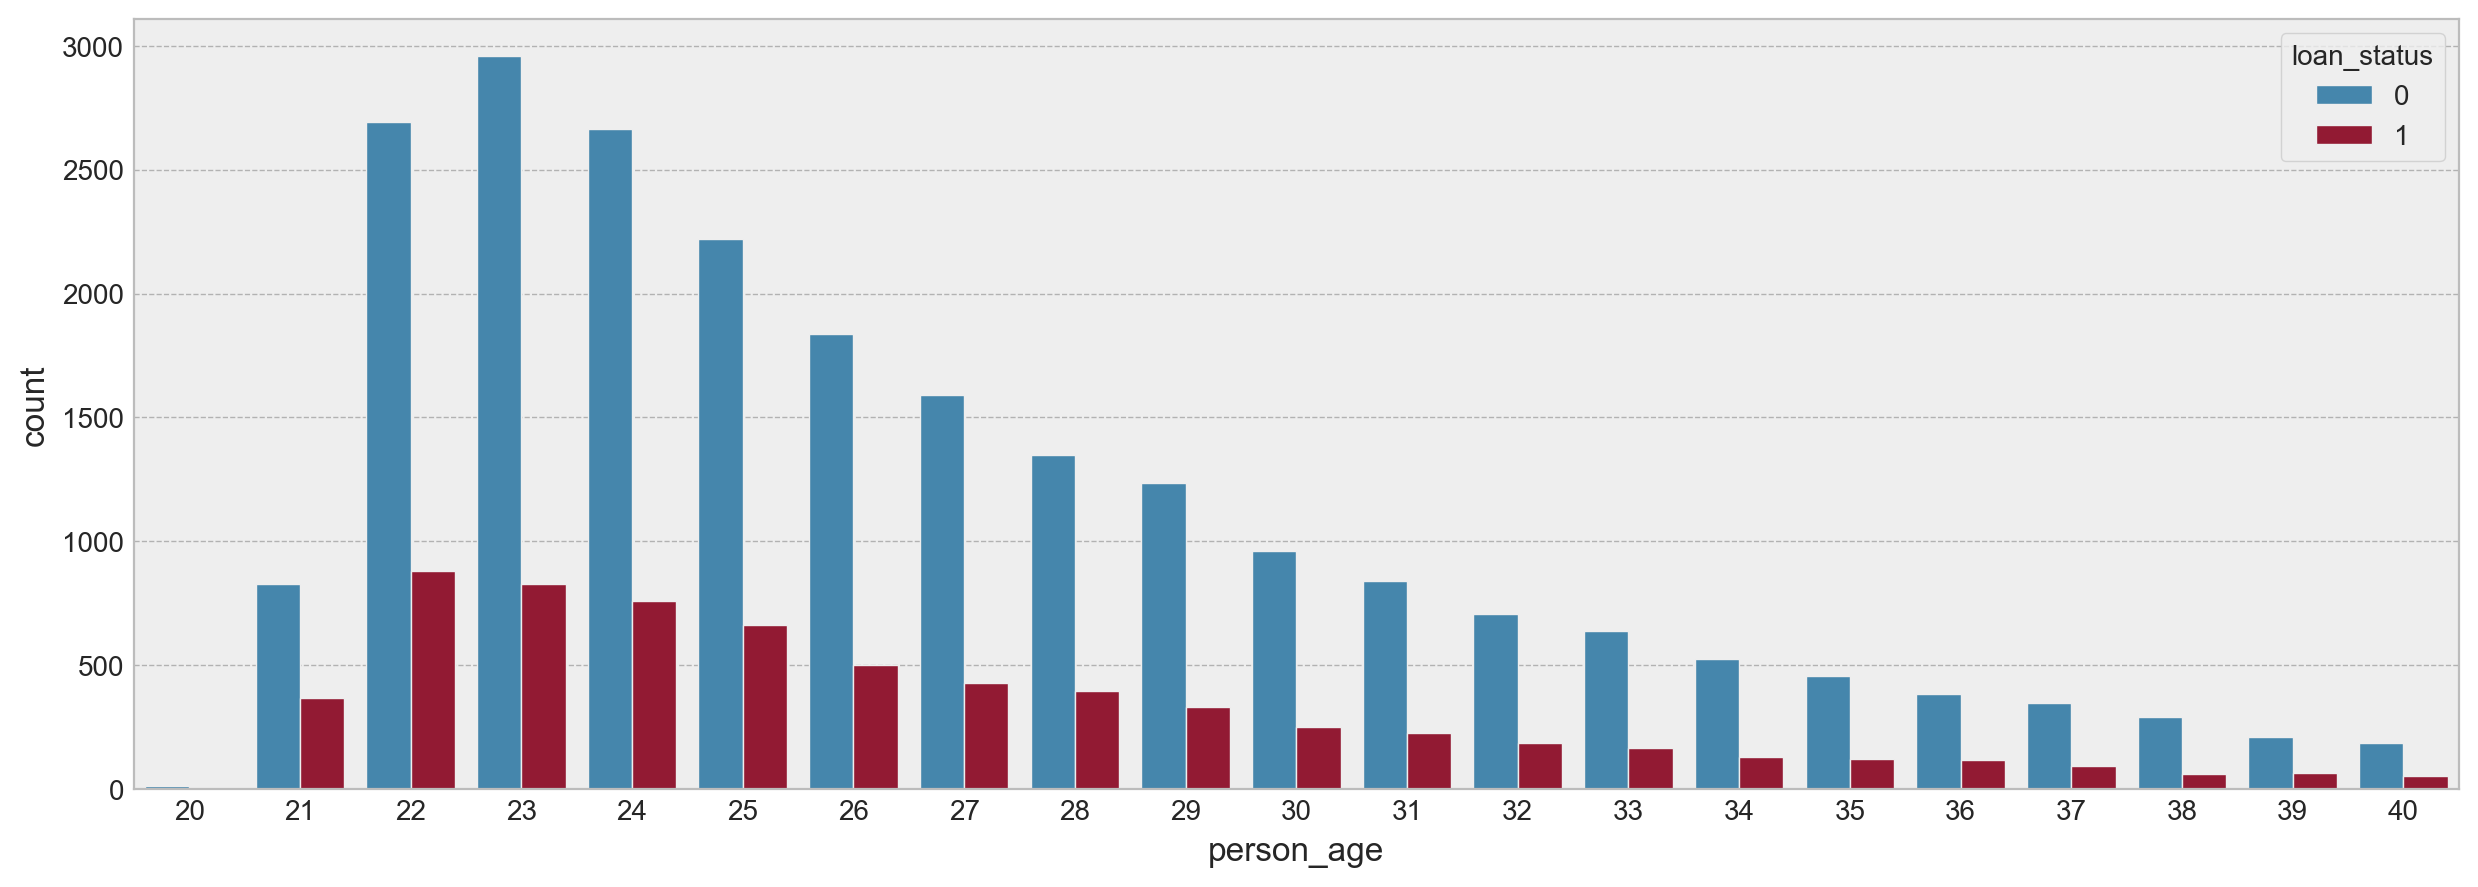

In [214]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'person_age',hue = 'loan_status', data = bank_df);

### A - Identify the Target Variable and Splitting the Data into Train and Test

In [129]:
# Identifying the inputs (X) and output (y)

y = bank_df['loan_status']

X = bank_df[['person_age', 'person_income', 'person_home_ownership', 
             'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'cb_person_default_on_file',
             'loan_percent_income','cb_person_cred_hist_length']]

In [130]:
X.shape
y.shape
X.head()
y.head()

(29568, 11)

(29568,)

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT             123.00   
1          21           9600                   OWN               5.00   
2          25           9600              MORTGAGE               1.00   
3          23          65500                  RENT               4.00   
4          24          54400                  RENT               8.00   

  loan_intent loan_grade  loan_amnt  loan_int_rate cb_person_default_on_file  \
0    PERSONAL          D      35000          16.02                         Y   
1   EDUCATION          B       1000          11.14                         N   
2     MEDICAL          C       5500          12.87                         N   
3     MEDICAL          C      35000          15.23                         N   
4     MEDICAL          C      35000          14.27                         Y   

   loan_percent_income  cb_person_cred_hist_length  
0                 0.59                           3  
1                 0.10                           2  
2                 0.57                           3  
3                 0.53                           2  
4                 0.55                           4

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [131]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(22176, 11) (22176,)
(7392, 11) (7392,)


### B. Separating Categorical and Numerical Columns:

In [132]:
X_train.head()
X_train.dtypes

person_age  person_income person_home_ownership  person_emp_length  \
13753          24          99000              MORTGAGE               8.00   
6663           24          50000              MORTGAGE               1.00   
18389          34          28800                  RENT               0.00   
4808           25          42996                  RENT               6.00   
10641          25          43000                  RENT               4.00   

             loan_intent loan_grade  loan_amnt  loan_int_rate  \
13753  DEBTCONSOLIDATION          A      12000           6.03   
6663            PERSONAL          C      11400          12.53   
18389           PERSONAL          F       2500          21.36   
4808   DEBTCONSOLIDATION          B       5000          10.38   
10641          EDUCATION          A      10000           7.66   

      cb_person_default_on_file  loan_percent_income  \
13753                         N                 0.12   
6663                          N                 0.23   
18389                         N                 0.09   
4808                          N                 0.12   
10641                         N                 0.23   

       cb_person_cred_hist_length  
13753                           2  
6663                            2  
18389                           9  
4808                            2  
10641                           3

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
cb_person_default_on_file      object
loan_percent_income           float64
cb_person_cred_hist_length      int64
dtype: object

In [133]:
X_train_cat_oh = X_train[['person_home_ownership','loan_intent']]

X_train_cat_oh.head(3)

person_home_ownership        loan_intent
13753              MORTGAGE  DEBTCONSOLIDATION
6663               MORTGAGE           PERSONAL
18389                  RENT           PERSONAL

In [134]:
X_train_cat_le = X_train[['loan_grade']]
X_train_cat_le.head(3)

loan_grade
13753          A
6663           C
18389          F

In [135]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
13753          24          99000               8.00      12000           6.03   
6663           24          50000               1.00      11400          12.53   
18389          34          28800               0.00       2500          21.36   
4808           25          42996               6.00       5000          10.38   
10641          25          43000               4.00      10000           7.66   

       loan_percent_income  cb_person_cred_hist_length  
13753                 0.12                           2  
6663                  0.23                           2  
18389                 0.09                           9  
4808                  0.12                           2  
10641                 0.23                           3

### C. Scaling the Numerical Features

In [136]:
X_train_num.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
13753          24          99000               8.00      12000           6.03   
6663           24          50000               1.00      11400          12.53   
18389          34          28800               0.00       2500          21.36   
4808           25          42996               6.00       5000          10.38   
10641          25          43000               4.00      10000           7.66   

       loan_percent_income  cb_person_cred_hist_length  
13753                 0.12                           2  
6663                  0.23                           2  
18389                 0.09                           9  
4808                  0.12                           2  
10641                 0.23                           3

In [137]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
13753       -0.60           1.47               0.88       0.45          -1.61   
6663        -0.60          -0.31              -0.95       0.35           0.50   
18389        1.62          -1.08              -1.21      -1.13           3.37   
4808        -0.38          -0.57               0.36      -0.71          -0.20   
10641       -0.38          -0.57              -0.16       0.12          -1.08   

       loan_percent_income  cb_person_cred_hist_length  
13753                -0.51                       -0.99  
6663                  0.51                       -0.99  
18389                -0.79                        1.13  
4808                 -0.51                       -0.99  
10641                 0.51                       -0.68

In [138]:
X_train_num_rescaled.describe()
X_train_num.describe()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
count    22176.00       22176.00           22176.00   22176.00       22176.00   
mean        -0.00          -0.00               0.00      -0.00          -0.00   
std          1.00           1.00               1.00       1.00           1.00   
min         -1.49          -1.98              -1.21      -1.46          -1.81   
25%         -0.82          -0.75              -0.69      -0.71          -0.81   
50%         -0.38          -0.16              -0.16      -0.21           0.00   
75%          0.51           0.60               0.62       0.45           0.69   
max          2.95           2.97              30.80       4.27           3.98   

       loan_percent_income  cb_person_cred_hist_length  
count             22176.00                    22176.00  
mean                  0.00                        0.00  
std                   1.00                        1.00  
min                  -1.53                       -0.99  
25%                  -0.79                       -0.68  
50%                  -0.23                       -0.38  
75%                   0.51                        0.53  
max                   6.09                        3.55

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
count    22176.00       22176.00           22176.00   22176.00       22176.00   
mean        26.71       58526.99               4.63    9288.18          10.99   
std          4.50       27461.89               3.84    6027.22           3.07   
min         20.00        4200.00               0.00     500.00           5.42   
25%         23.00       37894.00               2.00    5000.00           8.49   
50%         25.00       54000.00               4.00    8000.00          10.99   
75%         29.00       75000.00               7.00   12000.00          13.11   
max         40.00      140004.00             123.00   35000.00          23.22   

       loan_percent_income  cb_person_cred_hist_length  
count             22176.00                    22176.00  
mean                  0.17                        5.26  
std                   0.11                        3.31  
min                   0.01                        2.00  
25%                   0.09                        3.00  
50%                   0.15                        4.00  
75%                   0.23                        7.00  
max                   0.83                       17.00

In [139]:
print("Number of Numerical Features:", scaler.n_features_in_)
print('--'*50)
print("Mean of each column:", scaler.mean_)
print('--'*50)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 7
----------------------------------------------------------------------------------------------------
Mean of each column: [   26.71270743 58526.99062049     4.63293651  9288.18091631
    10.98524847     0.17499188     5.25721501]
----------------------------------------------------------------------------------------------------
Std of each column: [    4.5020571  27461.26909856     3.84278023  6027.08258877
     3.07488503     0.10760268     3.30629487]


### D. Applying OneHot Encoding on Categorical Columns

In [140]:
X_train_cat_oh = X_train[['person_home_ownership','loan_intent']]

X_train_cat_oh.head(3)

person_home_ownership        loan_intent
13753              MORTGAGE  DEBTCONSOLIDATION
6663               MORTGAGE           PERSONAL
18389                  RENT           PERSONAL

In [141]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_oh = pd.DataFrame(encoder.fit_transform(X_train_cat_oh), 
                               columns=encoder.get_feature_names_out(X_train_cat_oh.columns), 
                               index = X_train_cat_oh.index)

X_train_cat_oh.head()

person_home_ownership_OTHER  person_home_ownership_OWN  \
13753                         0.00                       0.00   
6663                          0.00                       0.00   
18389                         0.00                       0.00   
4808                          0.00                       0.00   
10641                         0.00                       0.00   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
13753                        0.00                   0.00   
6663                         0.00                   0.00   
18389                        1.00                   0.00   
4808                         1.00                   0.00   
10641                        1.00                   1.00   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
13753                         0.00                 0.00                  0.00   
6663                          0.00                 0.00                  1.00   
18389                         0.00                 0.00                  1.00   
4808                          0.00                 0.00                  0.00   
10641                         0.00                 0.00                  0.00   

       loan_intent_VENTURE  
13753                 0.00  
6663                  0.00  
18389                 0.00  
4808                  0.00  
10641                 0.00

## E. Applying Label Encoding on Categorical Columns

In [142]:
bank_df.groupby(['loan_grade'])[['loan_amnt']].mean()

loan_amnt
loan_grade           
A             8356.20
B             9611.05
C             8944.94
D            10464.84
E            12227.04
F            14244.50
G            16941.10

In [143]:
X_train_cat_label = X_train[['loan_grade']]
X_train_cat_label.head(3)

loan_grade
13753          A
6663           C
18389          F

In [144]:
X_train_cat_le = pd.DataFrame(index=X_train_cat_label.index)

X_train_cat_le.head()

Empty DataFrame
Columns: []
Index: [13753, 6663, 18389, 4808, 10641]

In [145]:
grade_encoder = {'A' : 1, 'C' : 2, 'B' : 3, 'D' : 4, 'E' : 5,'F' : 6,'G' : 7}

X_train_cat_le['loan_grade'] = X_train_cat_label['loan_grade'].apply(lambda x : grade_encoder[x])

X_train_cat_le.head()

loan_grade
13753           1
6663            2
18389           6
4808            3
10641           1

In [146]:
X_train_cat = pd.concat([X_train_cat_oh, X_train_cat_le], axis=1)
X_train_cat.head()

person_home_ownership_OTHER  person_home_ownership_OWN  \
13753                         0.00                       0.00   
6663                          0.00                       0.00   
18389                         0.00                       0.00   
4808                          0.00                       0.00   
10641                         0.00                       0.00   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
13753                        0.00                   0.00   
6663                         0.00                   0.00   
18389                        1.00                   0.00   
4808                         1.00                   0.00   
10641                        1.00                   1.00   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
13753                         0.00                 0.00                  0.00   
6663                          0.00                 0.00                  1.00   
18389                         0.00                 0.00                  1.00   
4808                          0.00                 0.00                  0.00   
10641                         0.00                 0.00                  0.00   

       loan_intent_VENTURE  loan_grade  
13753                 0.00           1  
6663                  0.00           2  
18389                 0.00           6  
4808                  0.00           3  
10641                 0.00           1

### F. Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [147]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat], axis=1)

X_train_transformed.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
13753       -0.60           1.47               0.88       0.45          -1.61   
6663        -0.60          -0.31              -0.95       0.35           0.50   
18389        1.62          -1.08              -1.21      -1.13           3.37   
4808        -0.38          -0.57               0.36      -0.71          -0.20   
10641       -0.38          -0.57              -0.16       0.12          -1.08   

       loan_percent_income  cb_person_cred_hist_length  \
13753                -0.51                       -0.99   
6663                  0.51                       -0.99   
18389                -0.79                        1.13   
4808                 -0.51                       -0.99   
10641                 0.51                       -0.68   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
13753                         0.00                       0.00   
6663                          0.00                       0.00   
18389                         0.00                       0.00   
4808                          0.00                       0.00   
10641                         0.00                       0.00   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
13753                        0.00                   0.00   
6663                         0.00                   0.00   
18389                        1.00                   0.00   
4808                         1.00                   0.00   
10641                        1.00                   1.00   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
13753                         0.00                 0.00                  0.00   
6663                          0.00                 0.00                  1.00   
18389                         0.00                 0.00                  1.00   
4808                          0.00                 0.00                  0.00   
10641                         0.00                 0.00                  0.00   

       loan_intent_VENTURE  loan_grade  
13753                 0.00           1  
6663                  0.00           2  
18389                 0.00           6  
4808                  0.00           3  
10641                 0.00           1

### G. Preparing Test Data

In [148]:
X_test.head()
X_test.info()

person_age  person_income person_home_ownership  person_emp_length  \
11279          23          45000                  RENT               7.00   
17564          28          84996                  RENT               8.00   
15422          23          85000                  RENT               4.00   
19419          31          91000                  RENT              12.00   
3203           22          36000                   OWN               4.00   

           loan_intent loan_grade  loan_amnt  loan_int_rate  \
11279        EDUCATION          D       4000          14.96   
17564  HOMEIMPROVEMENT          C      20000          13.92   
15422          VENTURE          A      16000           6.03   
19419        EDUCATION          A       4000           7.66   
3203         EDUCATION          D       5000          14.61   

      cb_person_default_on_file  loan_percent_income  \
11279                         N                 0.09   
17564                         N                 0.24   
15422                         N                 0.19   
19419                         N                 0.04   
3203                          N                 0.14   

       cb_person_cred_hist_length  
11279                           4  
17564                           9  
15422                           3  
19419                           6  
3203                            2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7392 entries, 11279 to 5551
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  7392 non-null   int64  
 1   person_income               7392 non-null   int64  
 2   person_home_ownership       7392 non-null   object 
 3   person_emp_length           7392 non-null   float64
 4   loan_intent                 7392 non-null   object 
 5   loan_grade                  7392 non-null   object 
 6   loan_amnt                   7392 non-null   int64  
 7   loan_int_rate               7392 non-null   float64
 8   cb_person_default_on_file   7392 non-null   object 
 9   loan_percent_income         7392 non-null   float64
 10  cb_person_cred_hist_length  7392 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 693.0+ KB


In [149]:
X_test_cat_oh = X_test[['person_home_ownership','loan_intent']]

X_test_cat_oh.head(3)

X_test_cat_label = X_test[['loan_grade']]
X_test_cat_label.head(3)

person_home_ownership      loan_intent
11279                  RENT        EDUCATION
17564                  RENT  HOMEIMPROVEMENT
15422                  RENT          VENTURE

loan_grade
11279          D
17564          C
15422          A

In [150]:
# onehotEncoding
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat_oh), 
                               columns=encoder.get_feature_names_out(X_test_cat_oh.columns), 
                               index = X_test_cat_oh.index)

X_test_cat_ohe.head()

person_home_ownership_OTHER  person_home_ownership_OWN  \
11279                         0.00                       0.00   
17564                         0.00                       0.00   
15422                         0.00                       0.00   
19419                         0.00                       0.00   
3203                          0.00                       1.00   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
11279                        1.00                   1.00   
17564                        1.00                   0.00   
15422                        1.00                   0.00   
19419                        1.00                   1.00   
3203                         0.00                   1.00   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
11279                         0.00                 0.00                  0.00   
17564                         1.00                 0.00                  0.00   
15422                         0.00                 0.00                  0.00   
19419                         0.00                 0.00                  0.00   
3203                          0.00                 0.00                  0.00   

       loan_intent_VENTURE  
11279                 0.00  
17564                 0.00  
15422                 1.00  
19419                 0.00  
3203                  0.00

In [151]:
# LabelEncoding
X_test_cat_le = pd.DataFrame(index=X_test_cat_label.index)

X_test_cat_le.head()

Empty DataFrame
Columns: []
Index: [11279, 17564, 15422, 19419, 3203]

In [152]:
grade_encoder = {'A' : 1, 'C' : 2, 'B' : 3, 'D' : 4, 'E' : 5,'F' : 6,'G' : 7}

X_test_cat_le['loan_grade'] = X_test_cat_label['loan_grade'].apply(lambda x : grade_encoder[x])

X_test_cat_le.head()

loan_grade
11279           4
17564           2
15422           1
19419           1
3203            4

In [153]:
X_test_cat = pd.concat([X_test_cat_ohe, X_test_cat_le], axis=1)
X_test_cat.head()

person_home_ownership_OTHER  person_home_ownership_OWN  \
11279                         0.00                       0.00   
17564                         0.00                       0.00   
15422                         0.00                       0.00   
19419                         0.00                       0.00   
3203                          0.00                       1.00   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
11279                        1.00                   1.00   
17564                        1.00                   0.00   
15422                        1.00                   0.00   
19419                        1.00                   1.00   
3203                         0.00                   1.00   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
11279                         0.00                 0.00                  0.00   
17564                         1.00                 0.00                  0.00   
15422                         0.00                 0.00                  0.00   
19419                         0.00                 0.00                  0.00   
3203                          0.00                 0.00                  0.00   

       loan_intent_VENTURE  loan_grade  
11279                 0.00           4  
17564                 0.00           2  
15422                 1.00           1  
19419                 0.00           1  
3203                  0.00           4

In [154]:
# Numerical Data
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
11279          23          45000               7.00       4000          14.96   
17564          28          84996               8.00      20000          13.92   
15422          23          85000               4.00      16000           6.03   
19419          31          91000              12.00       4000           7.66   
3203           22          36000               4.00       5000          14.61   

       loan_percent_income  cb_person_cred_hist_length  
11279                 0.09                           4  
17564                 0.24                           9  
15422                 0.19                           3  
19419                 0.04                           6  
3203                  0.14                           2

In [155]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
11279       -0.82          -0.49               0.62      -0.88           1.29   
17564        0.29           0.96               0.88       1.78           0.95   
15422       -0.82           0.96              -0.16       1.11          -1.61   
19419        0.95           1.18               1.92      -0.88          -1.08   
3203        -1.05          -0.82              -0.16      -0.71           1.18   

       loan_percent_income  cb_person_cred_hist_length  
11279                -0.79                       -0.38  
17564                 0.60                        1.13  
15422                 0.14                       -0.68  
19419                -1.25                        0.22  
3203                 -0.33                       -0.99

In [156]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat], axis=1)

X_test_transformed.head()


person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
11279       -0.82          -0.49               0.62      -0.88           1.29   
17564        0.29           0.96               0.88       1.78           0.95   
15422       -0.82           0.96              -0.16       1.11          -1.61   
19419        0.95           1.18               1.92      -0.88          -1.08   
3203        -1.05          -0.82              -0.16      -0.71           1.18   

       loan_percent_income  cb_person_cred_hist_length  \
11279                -0.79                       -0.38   
17564                 0.60                        1.13   
15422                 0.14                       -0.68   
19419                -1.25                        0.22   
3203                 -0.33                       -0.99   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
11279                         0.00                       0.00   
17564                         0.00                       0.00   
15422                         0.00                       0.00   
19419                         0.00                       0.00   
3203                          0.00                       1.00   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
11279                        1.00                   1.00   
17564                        1.00                   0.00   
15422                        1.00                   0.00   
19419                        1.00                   1.00   
3203                         0.00                   1.00   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
11279                         0.00                 0.00                  0.00   
17564                         1.00                 0.00                  0.00   
15422                         0.00                 0.00                  0.00   
19419                         0.00                 0.00                  0.00   
3203                          0.00                 0.00                  0.00   

       loan_intent_VENTURE  loan_grade  
11279                 0.00           4  
17564                 0.00           2  
15422                 1.00           1  
19419                 0.00           1  
3203                  0.00           4

In [157]:
X_test_transformed.isna().sum()

person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_percent_income            0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
loan_grade                     0
dtype: int64

## Classification Algorithms

### Logistic Regression

In [158]:
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [159]:
y_test_pred = classifier.predict(X_test_transformed)

In [160]:
bank_LR = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

bank_LR.head()

Actual  Predicted
11279       0          0
17564       0          0
15422       0          0
19419       0          0
3203        0          0

In [161]:
A = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8557900432900433


### KNN Classifier

In [162]:
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [163]:
y_test_pred = classifier.predict(X_test_transformed)

In [164]:
bank_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

bank_KNN.head()

Actual  Predicted
11279       0          0
17564       0          0
15422       0          0
19419       0          0
3203        0          0

In [165]:
B = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8938041125541125


### Support Vector Classifier

In [166]:
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [167]:
y_test_pred = classifier.predict(X_test_transformed)

In [168]:
bank_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

bank_KNN.head()

Actual  Predicted
11279       0          0
17564       0          0
15422       0          0
19419       0          0
3203        0          0

In [169]:
C = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.9099025974025974


### Decision Tree Classifier

In [170]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [171]:
y_test_pred = classifier.predict(X_test_transformed)

In [172]:
bank_DT = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

bank_DT.head()

Actual  Predicted
11279       0          1
17564       0          0
15422       0          0
19419       0          0
3203        0          0

In [173]:
D = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8832521645021645


### Random Forest Classifier

In [174]:
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [175]:
y_test_pred = classifier.predict(X_test_transformed)

In [176]:
bank_RF = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

bank_RF.head()

Actual  Predicted
11279       0          0
17564       0          0
15422       0          0
19419       0          0
3203        0          0

In [177]:
E = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.9338474025974026


### Gradient Boosting Classifier

In [178]:
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

GradientBoostingClassifier()

In [179]:
y_test_pred = classifier.predict(X_test_transformed)

In [180]:
bank_GB = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

bank_GB.head()

Actual  Predicted
11279       0          0
17564       0          0
15422       0          0
19419       0          0
3203        0          0

In [181]:
F = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.9247835497835498


### AdaBoostClassifier

In [182]:
classifier = AdaBoostClassifier()
classifier.fit(X_train_transformed, y_train)

AdaBoostClassifier()

In [183]:
y_test_pred = classifier.predict(X_test_transformed)

In [184]:
bank_AB = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

bank_AB.head()

Actual  Predicted
11279       0          1
17564       0          0
15422       0          0
19419       0          0
3203        0          0

In [185]:
G = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8873106060606061


In [186]:
Loan_default = {"Algorithm": ["LogisticRegression", " KNeighborsClassifier",'SV Classifier', " DT Classifier", "Random Forest Classifier", "Gradient-Boosting Classifier",'AdaBoostClassifier'],
           "Classification": ["Logit", "K-Nearest",'Support Vector', "Decision-Tree", "Ensemble", "Boosting","Boosting"],
           "Accuracy": [A,B,C,D,E,F,G],
           "Percentage": [86,89,91,88,93,92,89]}

In [187]:
Loan_status = pd.DataFrame(Loan_default)

In [216]:
Loan_status

Algorithm  Classification  Accuracy  Percentage
0            LogisticRegression           Logit      0.86          86
1          KNeighborsClassifier       K-Nearest      0.89          89
2                 SV Classifier  Support Vector      0.91          91
3                 DT Classifier   Decision-Tree      0.88          88
4      Random Forest Classifier        Ensemble      0.93          93
5  Gradient-Boosting Classifier        Boosting      0.92          92
6            AdaBoostClassifier        Boosting      0.89          89

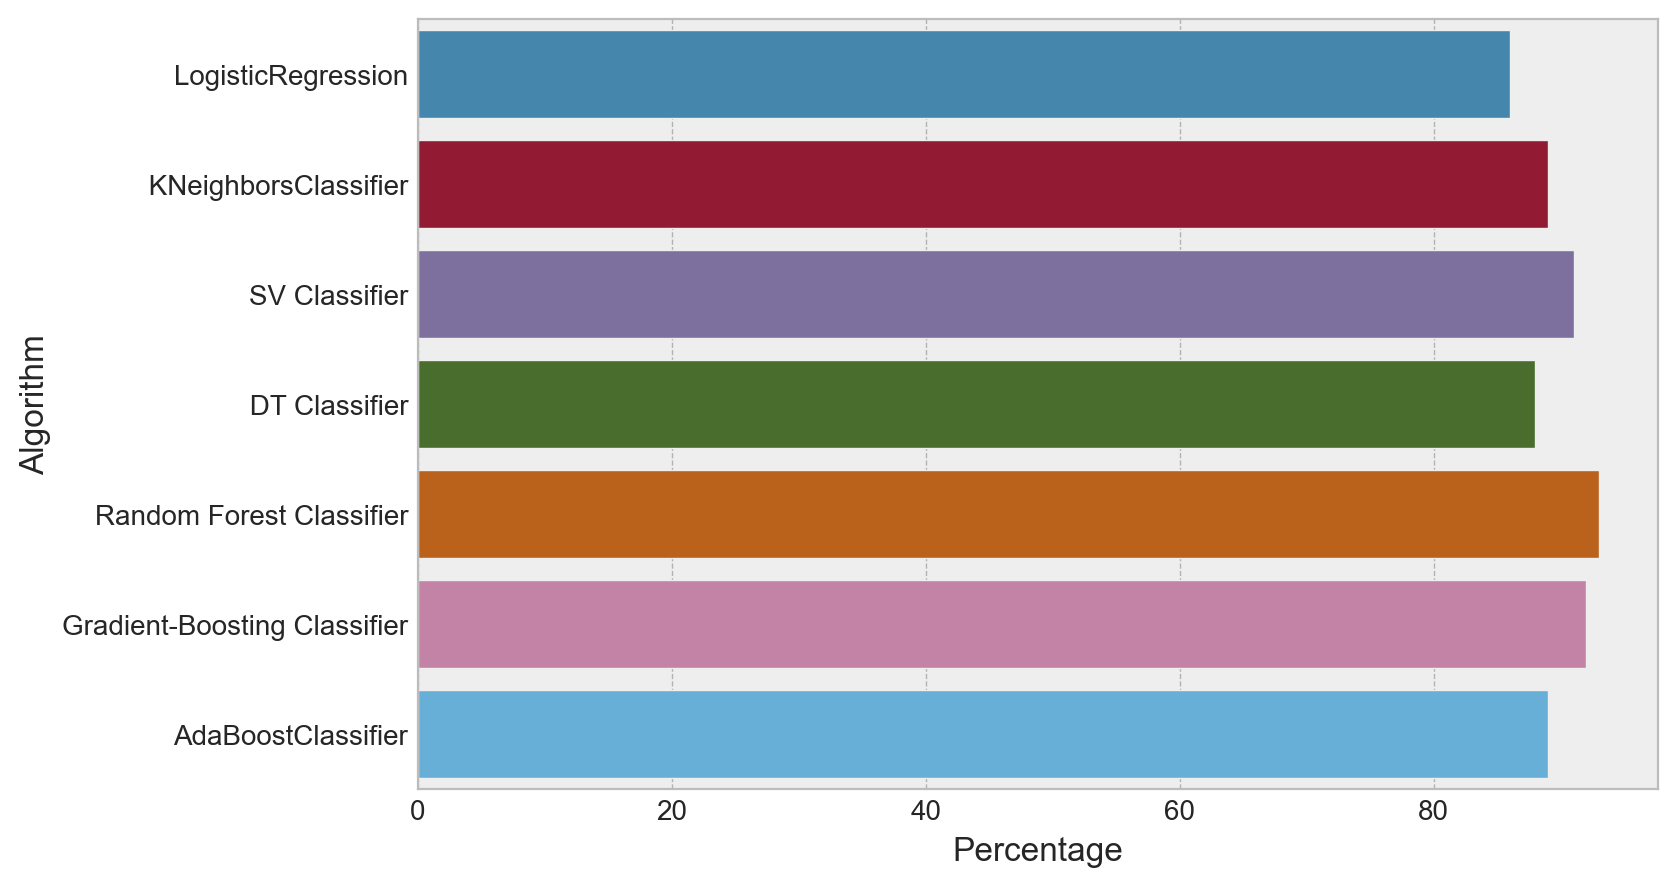

In [218]:
plt.figure(figsize=(8,5))
sns.barplot( x = 'Percentage',y ='Algorithm' , data = Loan_status,orient ='h');

*  The results of the evaluation `Accuracy` as the metric show that **`Random-Forest`** outperformed the other models, with a score of **93**

`GB-Model` had the second-best performance, with a score of **92**


####  These results suggest that **`Random-Forest`** may be the most effective model for this particular task, 
      Although further evaluation and validation is necessary to confirm this conclusion.